# **Modern Theory of Detection and Estimation**
## **Lab 1. Machine Learning for Regression**
### **Academic Year 2023/2024**

Bachelor's Degree in:
*   Mobile and Space Communications Engineering (groups 61 and 65)
*   Sound and Image Engineering (groups 66 and 69)
*   Telecomunication Technologies Engineering (groups 91, 92 and 95)
*   Telematics Engineering (groups 71 and 79)

Signal Theory and Communications Department.

## **Students information**

**Surname(s) and name(s):** Pablo Fernández Martín

**Group:** 91


# **Logistics**


**Setup Instructions**

You will need the files found at Aula Global (in the master group). Please download the files over to your own private folder. Navigate to the folder where you copied the files to, and the folder should contain "Lab_regression_student_23_24.ipynb" and "data_lab_reg.csv". Open Google Colab and upload the notebook. Sometimes it will take a minute or so for a new Jupyter server to start up on your behalf. Once it does, you are ready to start!

In the notebook, you will clearly see where you need to add code for the different problems or write an answer to a question.


#**Objective**

Nowadays, rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern.

Your neighbor Haruto wants to start his own bike rental business in Tokyo (Japan) and wants some help predicting the number of bikes required at each hour for the stable supply of rental bikes. It would be great if you could somehow create a model that allows him to put in a few (climate) features and returns an estimate of the number of bikes that would rented each hour.

Haruto has asked you if you could help him out with your new data science skills. You say yes, and decide that implementing some regression models might be a good path to solve this problem!

Your neighbor then gives you some information about the weather conditions (temperature, humidity, windspeed, snowfall, etc.) and the number of bikes rented per hour in Seoul (South Korea).

**Let's get started!**


Let's get our environment ready with the necessary libraries and then import the data!


In [ ]:
#Import the Python libraries that are used in this lab assignment
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

#To avoid warning messages
import warnings
warnings.filterwarnings('ignore')

# <font color = 'black'> 1. Seoul bike sharing demand dataset </font>

## 1.1 Description

We will take the Seoul bike sharing demand dataset, which contains information about the number of public bicycles rented per hour in the Seoul Bike Sharing System, with corresponding weather data and holiday information. The dataset presents the company's data between **December 1, 2017 and finishes one year later**. The goal is to facilitate the commute in the Seoul and reduce the amount of cars and the pollution.



This dataset is a reduced version of the original one that has been taken from the [UCI repository](https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand). The objective is to estimate the number of rented bikes in a date (column `Rented Bike Count`).


### Getting the data

Let's start uploading the dataset from the local drive. In the next code cell, just click on "Choose Files" (or "Elegir archivos"), then select the file "data_lab_reg.csv" and upload it.

Wait for the file to be 100% uploaded (100% done!).

Note: You should see the name of the file once Goole Colab has uploaded it.

In [ ]:
#Importing the dataset
from google.colab import files

uploaded = files.upload()

Saving data_lab_reg.csv to data_lab_reg (2).csv


In [ ]:
#Read the csv file into a DataFrame called Data
Data = pd.read_csv('data_lab_reg.csv',
                   header=0,
                   dtype={'Rented Bike Count': int,
                          'Hour':int,'Temperature(C)':float,
                          'Humidity(%)':float,
                          'Wind speed (m/s)':float,
                          'Visibility (10m)':float,
                          'Dew point temperature(C)':float,
                          'Solar Radiation (MJ/m2)':float,
                          'Rainfall(mm)':float,
                          'Snowfall (cm)':float})

Data is now a DataFrame. Let's have a look at the information it contains!

In [ ]:
display(Data)

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,254,0,-5.2,37.0,2.2,2000.0,-17.6,0.0,0.0,0.0
1,204,1,-5.5,38.0,0.8,2000.0,-17.6,0.0,0.0,0.0
2,173,2,-6.0,39.0,1.0,2000.0,-17.7,0.0,0.0,0.0
3,107,3,-6.2,40.0,0.9,2000.0,-17.6,0.0,0.0,0.0
4,78,4,-6.0,36.0,2.3,2000.0,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1243,1026,19,5.2,48.0,1.9,1590.0,-4.9,0.0,0.0,0.0
1244,818,20,4.1,54.0,1.3,1434.0,-4.3,0.0,0.0,0.0
1245,792,21,3.8,55.0,2.1,1231.0,-4.4,0.0,0.0,0.0
1246,726,22,3.0,59.0,1.1,1218.0,-4.2,0.0,0.0,0.0


As it can been observed, there are $1248$ samples (or observations) and each one corresponds to $10$ variables (or features). The corresponding **target** is the number of **rented bikes in a date** (column `Rented Bike Count`).

The variables that form each observation are:

*   `Rented Bike Count`: Count of bikes rented at each hour.
*   `Hour`: Hour of the day (a number between $0$ and $23$).
*   `Temperature(C)`: In Celsius (ºC)
*   `Humidity(%)`: It is the humidity in the air (in %)
*   `Wind speed (m/s)`: In m/s.
*   `Visibility (10m)`: 10 m (it is the distance to see and identify).
*   `Dew point temperature(C)`: Temperature at the beggining of the day in Celsius (ºC)
*   `Solar Radiation (MJ/m2)`: Sun contribution. It is measured in MJ/$\text{m}^2$
*   `Rainfall(mm)`: It is the amount of rain in mm
*   `Snowfall (cm)`: It is the amount of snow in cm


It is easy to observe that all the abovementioned **features** are **numerical values** (integer number or floating-point numbers)!

In [ ]:
Data.dtypes

Rented Bike Count             int64
Hour                          int64
Temperature(C)              float64
Humidity(%)                 float64
Wind speed (m/s)            float64
Visibility (10m)            float64
Dew point temperature(C)    float64
Solar Radiation (MJ/m2)     float64
Rainfall(mm)                float64
Snowfall (cm)               float64
dtype: object

Here is the statistical description of the numerical features.

In [ ]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,1248.0,743.803686,640.109054,2.0,234.500,579.00,1105.00,3418.00
Hour,1248.0,11.500000,6.924962,0.0,5.750,11.50,17.25,23.00
Temperature(C),1248.0,13.234535,12.492233,-16.4,2.675,15.05,22.80,37.90
Humidity(%),1248.0,58.207532,19.913471,14.0,42.750,57.00,72.00,98.00
Wind speed (m/s),1248.0,1.715865,0.997192,0.0,1.000,1.50,2.30,7.40
Visibility (10m),1248.0,1472.190705,573.151777,91.0,1046.750,1695.00,2000.00,2000.00
Dew point temperature(C),1248.0,4.438702,13.555036,-29.6,-4.800,6.20,15.80,25.50
Solar Radiation (MJ/m2),1248.0,0.558814,0.863956,0.0,0.000,0.01,0.91,3.45
Rainfall(mm),1248.0,0.192788,1.354607,0.0,0.000,0.00,0.00,21.50
Snowfall (cm),1248.0,0.068590,0.385575,0.0,0.000,0.00,0.00,4.30


In [ ]:
# Getting the column names!
feature_names = Data.columns.values[1:].tolist()

## 1.2 Data preparation

### 1.2.1 Preparing the data ($X$) and the target ($y$)

Create the matrix for data ($X$) and the targets ($y$). $X$ represents the observed data and $y$ is a vector that contains the desired values (actual or correct values) that we are trying to predict (usually called "targets" or "labels"). In this assignment, the targets are the values in column `Rented Bike Count`. So, $y$ is a one-dimensional array of length equal to the number of samples.

The dimension of $X$ is $1248\times9$, where the number of rows corresponds to the number of observations and the number of columns represent the features. Note that the features in this assignment are the columns:
*  `Hour`
*  `Temperature(C)`
*  `Humidity(%)`
*  `Wind speed (m/s)`
*  `Visibility (10m)`
*  `Dew point temperature(C)`
*  `Solar Radiation (MJ/m2)`
*  `Rainfall(mm)`
*  `Snowfall (cm)`

In [ ]:
# Let's obtain the data (X) and the targets (y)
X = Data.loc[:,Data.columns[1:10]].values
y = Data.loc[:,Data.columns[0]].values

Let's check out that everything is OK. How many samples are there in the dataset? Print it out!

In [ ]:
#YOUR CODE HERE
muestras = X.shape[0]
print( 'Muestras totales' , muestras)

Muestras totales 1248


What is the number of features per sample? Print it out!

In [ ]:
#YOUR CODE HERE
caracteristicas = X.shape[1]
print('Caracteristicas totales' , caracteristicas)

Caracteristicas totales 9


### 1.2.2 Training, validation and test sets

Splitting the dataset $([X,y])$ is essential for an unbiased evaluation of the prediction performance. In most cases, it is enough to split the dataset randomly into three subsets:
*   The **training set** is applied to train, or **fit**, the model. For example, it can be used to find the optimal weights (or coefficients) for linear regression, etc.
*   The **validation set** is used for unbiased model evaluation during hyperparameter tuning. For example, when you want to find the optimal value of `alpha` in a Ridge regressor or the best `kernel` for the Kernel Ridge regression, you experiment with different values or different types of kernels. For each considered setting of hyperparameters, you fit the model with the training set and assess its performance with the validation set.

*   The **test set** is needed for an unbiased evaluation of the final model. It shouldn't be used for fitting or validation tasks.

The sklearn function [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) can do this work for you!

**Note:** When comparing machine learning algorithms, it is desirable that they are fit and evaluated on the same subsets of the dataset. This can be achieved by fixing the seed for the pseudo-random number generator used when splitting the dataset. In the [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function, this can be reached by setting the `random_state` to a specific integer value.

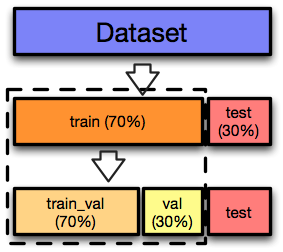

Split your **data** into **training** and **testing** (70/30) is indeed a good starting point!

For simplicity, use the names `X_train`, `X_test`, `y_train`, and `y_test` for the corresponding Numpy arrays.

$\underline{\text{Note}}$: Set `random_state` to a fixed value, for example, 42.

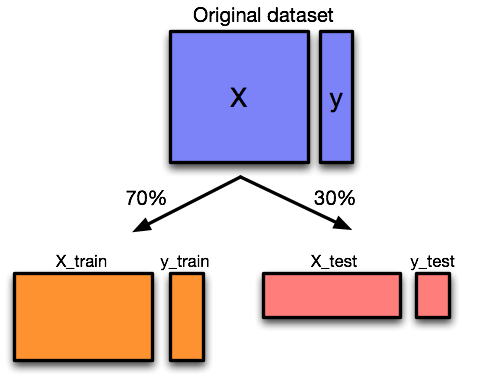

In [ ]:
#YOUR CODE HERE
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split (X, y, test_size = 0.3, random_state = 42)

How many samples are there in both train and test sets? Print it out!

In [ ]:
#YOUR CODE HERE
muestras_train = X_train.shape[0]
muestras_test = X_test.shape[0]
#Esto tambien se puede poner como len(X_test)
print('Muestras Train', muestras_train)
print('Muestras Test', muestras_test)

Muestras Train 873
Muestras Test 375


Now, split your **training data** ([`X_train`, `y_train`]) into two subsets: **train_val** and **val** (70/30).
For simplicity, use the names `X_train_val`, `X_val`, `y_train_val`, and `y_val` for the corresponding Numpy arrays.


$\underline{\text{Note}}$: Again, set `random_state` to a fixed value, for example, 42.

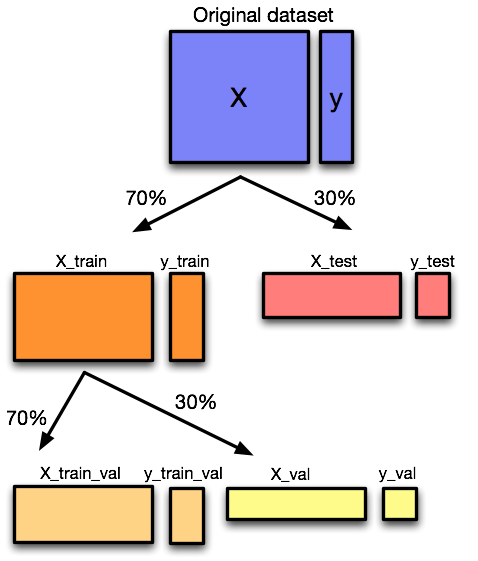

In [ ]:
#YOUR CODE HERE
import numpy as np
from sklearn.model_selection import train_test_split
X_train_val, X_val, y_train_val, y_val =  train_test_split (X_train, y_train, test_size = 0.3, random_state = 42)

How many samples are there in training, validation, and test subsets, respectively?

In [ ]:
#YOUR CODE HERE
muestras_train = X_train_val.shape[0]
muestras_val = X_val.shape[0]
muestras_test = X_test.shape[0]

print("Muestras Train", muestras_train)
print("Muestras Test", muestras_test)
print("Muestras Val", muestras_val)

Muestras Train 611
Muestras Test 375
Muestras Val 262


Please, check that the total number of samples is $1248$!

In [ ]:
#YOUR CODE HERE
print('Muestras:', X_val.shape[0] + X_test.shape[0] + X_train_val.shape[0])

Muestras: 1248


At this moment, there are avaible $3$ subsets for implementing the regression models:
*   `[X_train_val, y_train_val]`
*   `[X_val, y_val]`
*   `[X_test, y_test]`

# <font color = 'black'> 2. Modeling </font>

## 2.1 Regression evaluation metrics

Here are two common evaluation metrics for regression problems:

1)   **Coefficiente $R^2$** indicates the proportion of the variance in the estimated variable ($\hat{y}$) that can be explained by the observed variables. It can be computed as follows:

$$
R^2 = 1-\frac{\sum\limits_{i=1}^{N_t}{(y_i-\hat{y}_i)^2}}{\sum\limits_{i=1}^{N_t}{(y_i-\bar{y})^2}}
$$where:

* $N_t$ is the number of samples in the set.
* $\hat{y}_i$, $\,\,i=1,\dots,N_t\,$ are the estimated values (or estimations) made by the regressor for each $i$-th sample in the set.
* $y_i$, $\,\,i=1,\dots,N_t\,$ are the correct targets for each $i$-th sample in the set.
*$\bar{y}=\frac{1}{N_t}\sum\limits_{i=1}^{N_t}y_i\,$ is the average of the true targets for the samples in the set.

$R^2$ takes a maximum value of $1.0$ when the model makes an exact estimation of all the targets. The value of $R^2$ decreases as the estimation errors increase.

If the model is not perfect ($R^2=0$) but better than the trivial one, then $0 < R^2 < 1$. If $R^2$ falls below $0$ and takes negative values, it means that the estimation outputs by the model are worse than using the mean (trivial estimation).

In Python, there are several ways of calculating this coefficient:

  *   Using the function `r2_score` from the `sklearn.metrics` module.
  *   Using the `score()` method available in each (regression) model.


2)  **Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\text{RMSE} = \sqrt{\frac 1K\sum_{i=k}^k\Big(y^{(k)}-\hat{y}^{(k)}\Big)^2}$$

The lower the RMSE, the better a model fits a set.

In Python, this error can be calculated by using the function `mean_squared_error` from `sklearn.metrics`, with the parameter `squared` equal to `False`.



## 2.2 Standardization of features
The ranges of variation of the variables conforming to the observations can be very different. Therefore, a typical pre-processing operation consists of normalizing the input variables so that they have comparable ranges.

Perhaps the most used scaling within the machine learning community is standardization. It consists of a linear transformation that leaves each variable with zero mean and unit variance. The idea is to transform every variable in every observation by subtracting its mean and dividing by its standard deviation.

The model [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) of `Scikit-learn` can perform this job for you!


For this purpose, perform the following operations:
*  Create an instance of `StandardScaler`.
*  Fit the scaler with the training data (`X_train_val`).
*  Create three new matrices:
    - `X_train_s`: It contains the result of transforming `X_train_val` with the scaler.
    - `X_val_s`: It contains the result of transforming `X_val` with the scaler.
    - `X_test_s`: It contains the result of transforming `X_test` with the scaler.


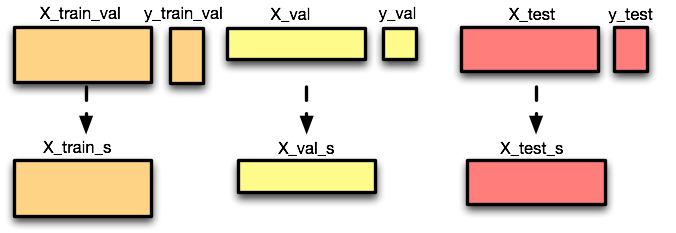

In [ ]:
#YOUR CODE HERE
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train_val)
X_val_s = scaler.fit_transform(X_val)
X_test_s = scaler.fit_transform(X_test)

In [ ]:
#Let's check out that everything is ok!
print('TRAINING SET')
print('Mean of each feature: ', np.round(np.mean(X_train_s,0),2))
print('Std of each feature: ', np.round(np.std(X_train_s,0),2))
print('\nVALIDATION SET')
print('Mean of each feature: ', np.round(np.mean(X_val_s,0),2))
print('Std of each feature: ', np.round(np.std(X_val_s,0),2))
print('\nTEST SET')
print('Mean of each feature: ', np.round(np.mean(X_test_s,0),2))
print('Std of each feature: ', np.round(np.std(X_test_s,0),2))

TRAINING SET
Mean of each feature:  [-0. -0. -0.  0. -0. -0.  0.  0.  0.]
Std of each feature:  [1. 1. 1. 1. 1. 1. 1. 1. 1.]

VALIDATION SET
Mean of each feature:  [-0.  0.  0. -0. -0. -0. -0.  0.  0.]
Std of each feature:  [1. 1. 1. 1. 1. 1. 1. 1. 1.]

TEST SET
Mean of each feature:  [ 0. -0.  0.  0. -0. -0. -0.  0. -0.]
Std of each feature:  [1. 1. 1. 1. 1. 1. 1. 1. 1.]


From now on, please work with **standardized features**. In other words, the $3$ subsets for implementing the regression models are:
*   `[X_train_s, y_train_val]`
*   `[X_val_s, y_val]`
*   `[X_test_s, y_test]`



## 2.3 Designing the estimation models

### 2.3.1 Linear regression

> **Training the model**

*   First, import the package: `from sklearn.linear_model import LinearRegression`
*   Then, create the model object.
*   Next, fit the training data. This creates a trained model (an object) of class regression.
The variety of methods and attributes available for regression are shown [here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

In [ ]:
#YOUR CODE HERE
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train_s, y_train_val)


> **Prediction from our model**

Let's grab predictions off our test set and see how well it did!

In [ ]:
#YOUR CODE HERE
prediction = lr.predict (X_test_s)


> **Evaluation the model**

Let's evaluate the model by computing the $R^2$ and RMSE metrics and print out the results. Please, round any number off to 2 places.

In [ ]:
#YOUR CODE HERE
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

r2score = lr.score(X_test_s, y_test)
rmse = np.sqrt(mean_squared_error(y_test, prediction))
print('Coeficioente R^2:' , round(r2score,2))
print('Error cuadratico medio(RMSE):' , round(rmse,2))


Coeficioente R^2: 0.47
Error cuadratico medio(RMSE): 500.45


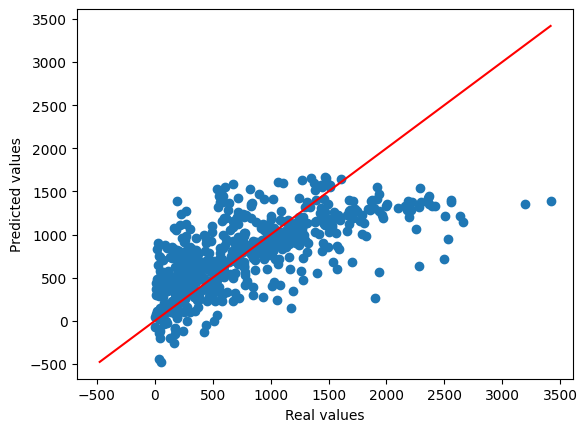

In [ ]:
# Produce a scatter plot with the representation of the real value of the label vs. the estimated value obtained for the training set.
s_train_lr = lr.predict(X_train_s)
plt.scatter(y_train_val,s_train_lr)
p1 = max(max(s_train_lr), max(y_train_val))
p2 = min(min(s_train_lr), min(y_train_val))
plt.plot([p1, p2], [p1, p2], 'r-')
plt.xlabel('Real values')
plt.ylabel('Predicted values')
plt.show()

Having a look at the scatter plot, are there outliers in the dataset? Justify your answer.

$\underline{\text{Note}}$: An outlier is a sample or observation that is an abnormal distance from other samples. In other words, it is data that lies outside the other values in the set.
If you had Pinocchio in a class of children, the length of his nose compared to the other children, would be an outlier.


<font color = 'green'> YOUR ANSWER HERE


###2.3.2 Linear Ridge Regression

> **Selecting the best value of alpha ($\alpha$)**

The first task here is to obtain a reasonable value of `alpha` for the linear Ridge regressor. In this assignment, the corresponding range that will be explored for `alpha` is: `[1e-5, 1e-4, 0.001, 0.01, 0.1,  1, 10, 100, 200]`. For each value of `alpha`, compute the $R^2$ for the validation set and plot all the metrics in the same figure.

*   First, import the package: `from sklearn.linear_model import Ridge`
*   Then, create the model object.
*   Next, fit the training data. This creates a trained model (an object) of class regression.
*   Then, compute the $R^2$ for the validation data and keep it in a 1D array and plot it in a figure! Please,  use log-scale in x-axis.


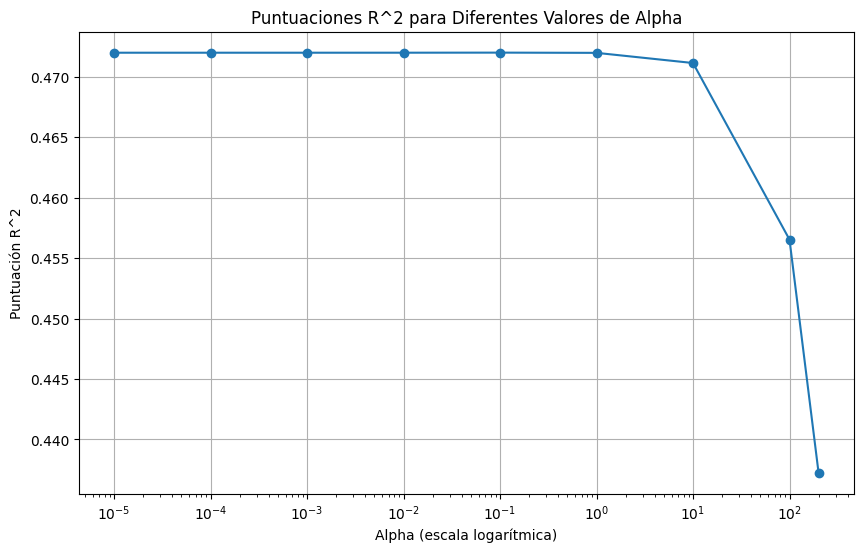

In [ ]:
# YOUR CODE HERE
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

# Definimos una lista de valores de alpha que vamos a explorar
array_alpha = [1e-5, 1e-4, 0.001, 0.01, 0.1, 1, 10, 100, 200]
# Creamos una lista para almacenar los valores de R^2 para cada alpha
r2_scores = []

# Recorremos los diferentes valores de alpha
for alpha in array_alpha:
    # Creamos un modelo de regresión Ridge con el valor de alpha actual
    clf = Ridge(alpha=alpha)
     # Entrenamos el modelo con los datos de entrenamiento
    clf.fit(X_train_s, y_train_val)
    # Realizamos predicciones en los datos de validación
    prediction = clf.predict(X_test_s)
    # Calculamos el valor de R^2 para el modelo Ridge actual
    r2score = clf.score(X_test_s, y_test)
     # Almacenamos el valor de R^2 en la lista
    r2_scores.append(r2score)

# La figura y el gráfico deben estar fuera del bucle
plt.figure(figsize=(10, 6))
plt.semilogx(array_alpha, r2_scores, marker='o')
plt.title("Puntuaciones R^2 para Diferentes Valores de Alpha")
plt.xlabel("Alpha (escala logarítmica)")
plt.ylabel("Puntuación R^2")
plt.grid(True)
plt.show()



What is the best value for `alpha`?

<font color = 'green'> YOUR ANSWER HERE

In [ ]:
# YOUR CODE HERE
#Max sirve para encontrar el maximo y .index para la posicion del maximo
best_alpha = array_alpha[r2_scores.index(max(r2_scores))]
print("El mejor valor de alpha es:", best_alpha)

El mejor valor de alpha es: 0.1


> **Training and evaluating the model**

*   Now, create a model object.
*   Next, fit the training data with the best value of alpha.
*   Let us evaluate the model by computing the $R^2$ and RMSE metrics (over the test set) and print out the results. Please, round any number off to 2 places.

In [ ]:
# YOUR CODE HERE
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Crea un modelo Ridge con el mejor valor de alpha
best_alpha = array_alpha[r2_scores.index(max(r2_scores))]
ridge_best = Ridge(alpha=best_alpha)

# Ajusta el modelo con los datos de entrenamiento
ridge_best.fit(X_train_s, y_train_val)

# Realiza predicciones en el conjunto de prueba
y_pred = ridge_best.predict(X_test_s)

# Calcula la métrica R^2
r2 = r2_score(y_test, y_pred)

# Calcula la métrica RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Imprime los resultados redondeados a 2 decimales
print("R^2 en el conjunto de prueba:", round(r2, 2))
print("RMSE en el conjunto de prueba:", round(rmse, 2))

R^2 en el conjunto de prueba: 0.47
RMSE en el conjunto de prueba: 500.44


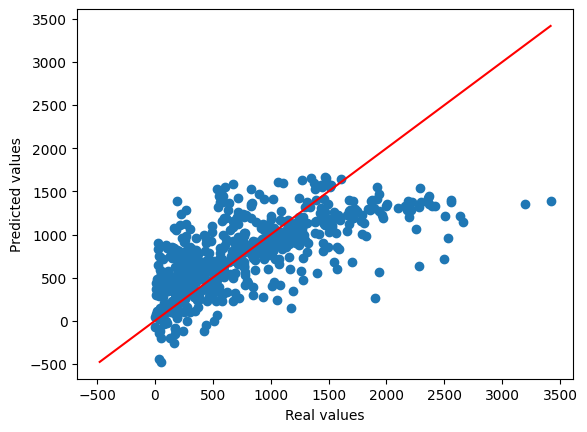

In [ ]:
# Produce a scatter plot with the representation of the real value of the label vs the estimated value with the best value of alpha for the training set.
s_ridge = ridge_best.predict(X_train_s)
plt.scatter(y_train_val,s_ridge)
p1 = max(max(s_ridge), max(y_train))
p2 = min(min(s_ridge), min(y_train))
plt.plot([p1, p2], [p1, p2], 'r-')# pintar una función desde el punto [0,0] al [50,50]
plt.xlabel('Real values')
plt.ylabel('Predicted values')
plt.show()

###2.3.3 Linear Lasso Regression

> **Selecting the best value of alpha**

As previously, the first task is to obtain a reasonable value of `alpha` for the Lasso regressor.

In this assignment, the corresponding range that will be explored for `alpha` is: `[0.001, 0.01, 0.05, 0.1, 1, 5, 10]`. For each value of `alpha`, compute the $R^2$ for the validation set and plot all the metrics in the same figure.

*   First, import the package: from `sklearn.linear_model import Lasso`
*   Then, create the model object.
*   Next, fit the subtraining data. This creates a trained model (an object) of class regression.
*   Then, compute the $R^2$ for the validation data and keep it in a 1D array and plot it in a figure! Please, use log-scale in x-axis.



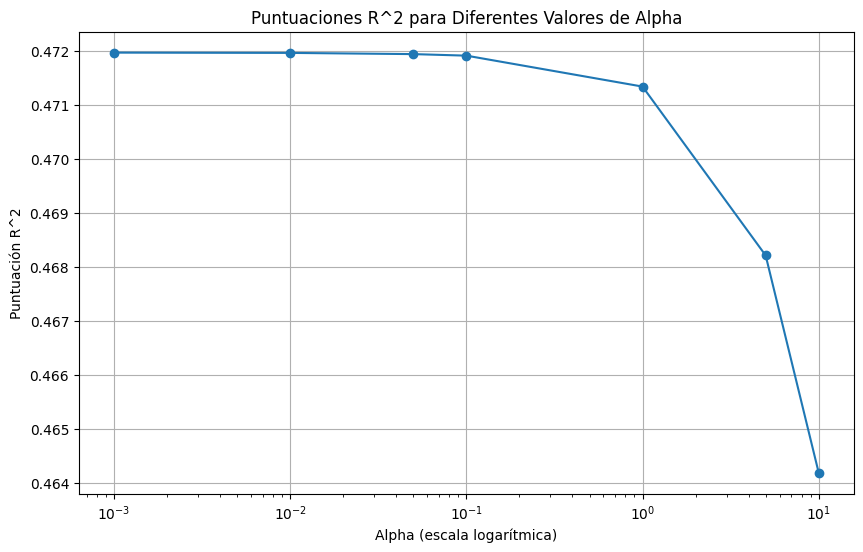

In [ ]:
# YOUR CODE HERE
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

# Definimos una lista de valores de alpha que vamos a explorar
array_alpha = [0.001, 0.01, 0.05, 0.1, 1, 5, 10]
# Creamos una lista para almacenar los valores de R^2 para cada alpha
r2_scores = []

# Recorremos los diferentes valores de alpha
for alpha in array_alpha:
    # Creamos un modelo de regresión Ridge con el valor de alpha actual
    lasso_model = Lasso (alpha=alpha)
     # Entrenamos el modelo con los datos de entrenamiento
    lasso_model.fit(X_train_s, y_train_val)

    # Calculamos el valor de R^2 para el modelo Ridge actual
    r2 = lasso_model.score(X_test_s, y_test)
     # Almacenamos el valor de R^2 en la lista
    r2_scores.append(r2)

# La figura y el gráfico deben estar fuera del bucle
plt.figure(figsize=(10, 6))
plt.semilogx(array_alpha, r2_scores, marker='o')
plt.title("Puntuaciones R^2 para Diferentes Valores de Alpha")
plt.xlabel("Alpha (escala logarítmica)")
plt.ylabel("Puntuación R^2")
plt.grid(True)
plt.show()



What is the best value for `alpha`?

<font color = 'green'> YOUR ANSWER HERE

In [ ]:
# YOUR CODE HERE
#Max sirve para encontrar el maximo y .index para la posicion del maximo
best_alpha = array_alpha[r2_scores.index(max(r2_scores))]
print("The best alpha value is:", best_alpha)


The best alpha value is: 0.001


> **Training and evaluating the model**

*   Now, create a model object.
*   Next, fit the training data with the best value of `alpha`.
*   Let us evaluate the model by computing the $R^2$ and RMSE metrics (over the test set) and print out the results. Please, round any number off to 2 places.

In [ ]:
# YOUR CODE HERE
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Crea un modelo Lasso con el mejor valor de alpha
mejor_alpha = array_alpha[r2_scores.index(max(r2_scores))]
modelo_lasso = Lasso(alpha=mejor_alpha)

# Ajusta el modelo a los datos de entrenamiento
modelo_lasso.fit(X_train_s, y_train_val)

# Realiza predicciones en el conjunto de pruebas
predicciones = modelo_lasso.predict(X_test_s)

# Calcula la puntuación R^2
r2 = r2_score(y_test, predicciones)

# Calcula el RMSE (Error Cuadrático Medio)
rmse = np.sqrt(mean_squared_error(y_test, predicciones))

# Imprime los resultados redondeados a 2 decimales
print("R^2 en el conjunto de pruebas:", round(r2, 2))
print("RMSE en el conjunto de pruebas:", round(rmse, 2))




R^2 en el conjunto de pruebas: 0.47
RMSE en el conjunto de pruebas: 500.45


Having a look at the metrics reached by the three regression models explored (linear regression, Ridge regression and Lasso regression), would you think that there are outliers in the dataset? Justify your answer.

<font color = 'green'> YOUR ANSWER HERE

### 2.3.4 Kernel Ridge Regression

> **Selecting the best values of alpha and gamma**

The kernel used is `rbf`. RBF kernels are the most generalized form of kernelization and are one of the most widely used kernels due to their similarity to the Gaussian distribution.


Therefore, the first task is to obtain a reasonable value of `alpha` and `gamma` for the Kernel Ridge regressor.

In this assignment the corresponding ranges that will be explored for `alpha` is: `[0.01, 0.1, 1, 1.25, 1.5, 1.75, 2]` and for `gamma`: `[0.01, 0.05, 0.1, 0.5, 1]`. For each value of `alpha` and `gamma`, compute the $R^2$ for the validation set.

*   First, import the package: from `sklearn.kernel_ridge import KernelRidge`
*   Then, create the model object.
*   Next, fit the training data. This creates a trained model (an object) of class regression.
*   Then, compute the $R^2$ for the validation data and keep it in a 2D array.



In [ ]:
# YOUR CODE HERE
from sklearn.kernel_ridge import KernelRidge
import numpy as np

# Define las listas de valores para alpha y gamma
alphas = [0.01, 0.1, 1, 1.25, 1.5, 1.75, 2]
gammas = [0.01, 0.05, 0.1, 0.5, 1]

# Crea una matriz para almacenar las puntuaciones R^2
r2_scores = np.zeros((len(alphas), len(gammas)))

# Recorre los diferentes valores de alpha y gamma, numerate accede tanto a la posicion como al valor
for i, alpha in enumerate(alphas):
    for j, gamma in enumerate(gammas):
        # Crea un modelo Kernel Ridge con los valores de alpha y gamma actuales
        kernel_ridge_model = KernelRidge(alpha=alpha, kernel='rbf', gamma=gamma)

        # Ajusta el modelo a los datos de entrenamiento, para hacer fit estas variables
        kernel_ridge_model.fit(X_train_s, y_train_val)

        # Calcula la métrica R^2 en el conjunto de validación y guárdala en la matriz, para hacer score estas variables, luego elegir alpha
        r2 = kernel_ridge_model.score(X_val_s, y_val)
        r2_scores[i][j] = r2

# La matriz r2_scores contiene las puntuaciones R^2 para cada combinación de alpha y gamma


What is the best value for `gamma`? And for `alpha`?

<font color = 'green'> YOUR ANSWER HERE

In [ ]:
# YOUR CODE HERE



# Supongamos que r2_scores es una matriz de puntuaciones R^2
# Encuentra la posición (índices) de la máxima puntuación R^2
max_r2_index = np.unravel_index(np.argmax(r2_scores), r2_scores.shape)

# Encuentra los valores específicos de gamma y alpha correspondientes a la máxima puntuación R^2
best_gamma = gammas[max_r2_index[1]]
best_alpha = alphas[max_r2_index[0]]

print("El mejor valor de gamma es:", best_gamma)
print("El mejor valor de alpha es:", best_alpha)






El mejor valor de gamma es: 0.5
El mejor valor de alpha es: 0.1


> **Training and evaluating the model**

*   Now, create a `Kernel Ridge Regression` model object.
*   Next, fit the training data with the best value of `alpha` and `gamma`
*   Let us evaluate the model by computing the $R^2$ and RMSE metrics (over the test set) and print out the results. Please, round any number off to 2 places.

In [ ]:
# YOUR CODE HERE

#Crear el modelo de kernelRidge con los mejores valores de alpha y gamma
kernel_ridge = KernelRidge(alpha= best_alpha, kernel='rbf', gamma=best_gamma)
#hacer fit a esas variables
kernel_ridge.fit(X_train_s, y_train_val)
predicciones = kernel_ridge.predict(X_test_s)
#hacer score de las variables
r2 = kernel_ridge_model.score(X_test_s, y_test)
rmse = np.sqrt(mean_squared_error(y_test, predicciones))
print(round(r2,2))
print(round(rmse,2))




0.54
335.65


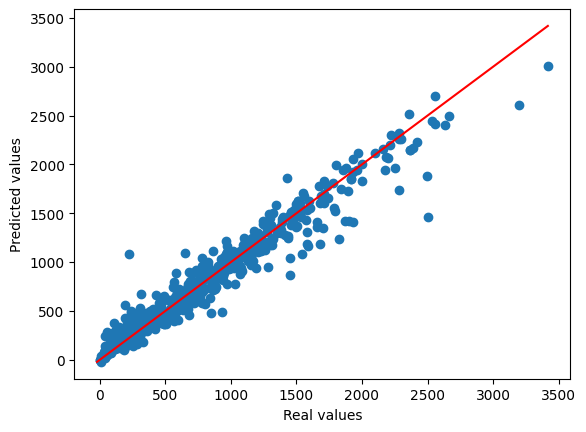

In [ ]:
# Produce a scatter plot with the representation of the real value of the label vs the estimated value with the best values of alpha and gamma for the training set
s_train_kernel_ridge = kernel_ridge.predict(X_train_s)
plt.scatter(y_train_val,s_train_kernel_ridge)
p1 = max(max(s_train_kernel_ridge), max(y_train))
p2 = min(min(s_train_kernel_ridge), min(y_train))
plt.plot([p1, p2], [p1, p2], 'r-')
plt.xlabel('Real values')
plt.ylabel('Predicted values')
plt.show()

Is there any difference between this representation and those obtained for the other regressos explored in this assignment?

<font color = 'green'> YOUR ANSWER HERE

# <font color = 'black'> 3. Role of each variable in the model </font>

As it was explained in the master class, the coefficients represent the strength and direction of the relationship between the features and the target variable. If some coefficient is set to $0$ means that the corresponding feature has been excluded from the model.  

## 3.1. Linear regression case
In the linear regression case:
$$
f(\mathbf x) = \mathbf w^\top \mathbf x + w_0 = w_0 + \sum_{k=1}^d w_kx_k
$$each variable $x_k$ contribution to the predictive function is its value multiplied by the weight $w_k$.

Retrieve the coefficients of the  linear regressor in Section 2.3.1 and print the relevance of the features based on these weights.


In [ ]:
#YOUR CODE HERE
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_s, y_train_val)

coefficients = model.coef_
for i, feature in enumerate(feature_names):
    print(f"{feature}: {coefficients[i]}")


Hour: 200.88308169879878
Temperature(C): 27.252929256765867
Humidity(%): -280.4385490071449
Wind speed (m/s): -5.506132730030984
Visibility (10m): 21.069007385089296
Dew point temperature(C): 371.3018311197391
Solar Radiation (MJ/m2): -61.13177772596602
Rainfall(mm): -52.13279142391106
Snowfall (cm): 5.429499349240983


What is the most relevante feature? And the least one?

<font color = 'green'> YOUR ANSWER HERE


## 3.2 Regression models with the best feature

### 3.2.1 Linear regression

Based on the previous results, **select the most important feature** and train and evaluate a linear regression model using only this feature.

Then, evaluate the model by computing the $R^2$ and RMSE metrics (over the test set) and print out the results. Please, round any number off to 2 places.

In [ ]:
#YOUR CODE HERE

max_coefficient = 0
pos_coeff = 0
for i in range(len(coefficients)):
    if abs(coefficients[i]) > max_coefficient:
        max_coefficient = abs(coefficients[i])
        pos_coeff = i
print("best_feature:", pos_coeff)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

model = LinearRegression()
X_train_selected = X_train_s[:, pos_coeff].reshape(611, 1)
X_test_selected = X_test_s[:, pos_coeff].reshape(-1, 1)

model.fit(X_train_selected, y_train_val)
prediccion = model.predict(X_test_selected)
r2 = r2_score(y_test, prediccion)
rmse = np.sqrt(mean_squared_error(y_test, prediccion))
# Imprimir los resultados
print(f"Coeficiente R^2: {r2:.2f}")
print(f"Error Cuadrático Medio (RMSE): {rmse:.2f}")




best_feature: 5
Coeficiente R^2: 0.13
Error Cuadrático Medio (RMSE): 641.62


In [ ]:
#YOUR CODE HERE


### 3.2.2 Semi-linear regression with the best feature

What happens if we use a semi-linear regression model with a quadratic function?
$$
f(x)= w_0 + w_1 x + w_2 x^2
$$

where $x$ represents the observed variable ($-$ best feature in this assignment).


Train and evaluate a model by computing the $R^2$ and RMSE metrics (over the test set) and print out the results. Please, round any number off to 2 places.

In [ ]:
#YOUR CODE HERE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

best_feature = pos_coeff

model = LinearRegression()
X_train_selected = X_train_s[:, best_feature].reshape(-1, 1)
X_test_selected = X_test_s[:, best_feature].reshape(-1, 1)

X_train_sq = np.square(X_train_selected)
X_test_sq = np.square(X_test_selected)

model.fit(X_train_sq, y_train_val)
prediccion = model.predict(X_test_sq)
r2 = r2_score(y_test, prediccion)
rmse = np.sqrt(mean_squared_error(y_test, prediccion))
# Imprimir los resultados
print(f"Coeficiente R^2: {r2:.2f}")
print(f"Error Cuadrático Medio (RMSE): {rmse:.2f}")


Coeficiente R^2: 0.09
Error Cuadrático Medio (RMSE): 656.77


## <font color = 'black'> 3.3 Coefficients of Lasso Regression </font>

In Lasso regression, some of the coefficients will be set to $0$, which means that the corresponding feature has been excluded from the model. The non-zero coefficients represent the features that are most important for predicting the target variable.

Extend the features of the train and test subsets to products of some of the original columns to construct a polynomial function of the original features.

In `scikit-learn`, there is a module called [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) that allows to create the polynomial expansion of the columns up to a certain degree. In this assignment, the hyperparameter `degree` is set to $2$.

In [ ]:
#YOUR CODE HERE
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree =2)
X_train_p = poly.fit_transform(X_train_s)
X_test_p = poly.transform(X_test_s)

Now, how many features are there in training and test sets, respectively?

In [ ]:
#YOUR CODE HERE
print(X_train_p.shape[1])
print(X_test_p.shape[1])

55
55


Are all of them important for the regression task?

Use a `Lasso` regressor to find out the regression model in the new feature space determined by the polynomial expansion of the columns. For this task, the hyperparameter `alpha` is set to $0.5$.

In [ ]:
#YOUR CODE HERE
from sklearn.linear_model import Lasso

lassoM = Lasso(0.5)
lassoM.fit(X_train_p,y_train_val)

# Calcular las predicciones en el conjunto de prueba extendido
pred_p = lassoM.predict(X_test_p)

Is there any coefficient equal to $0$?

<font color = 'green'> YOUR ANSWER HERE

In [ ]:
#YOUR CODE HERE
zero_coefficients = sum(lassoM.coef_ == 0)
print(f"Número de coeficientes iguales a cero: {zero_coefficients}")

Número de coeficientes iguales a cero: 14


Calculate the $R^2$ and RMSE metrics (over the "new" test set) and print out the results. Please, round any number off to 2 places.

In [ ]:
#YOUR CODE HERE
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

r2 = r2_score(y_test, pred_p)
rmse = np.sqrt(mean_squared_error(y_test, pred_p))

print(f"Coeficiente R^2: {r2:.2f}")
print(f"Error Cuadrático Medio (RMSE): {rmse:.2f}")


Coeficiente R^2: 0.60
Error Cuadrático Medio (RMSE): 436.92


Finally, implement a linear regression model for the extended train and test subsets. Compute both $R^2$ and RMSE metrics and check if there is any coefficient in this model equal to zero.

In [ ]:
#YOUR CODE HERE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

linearRegressionM = LinearRegression()
linearRegressionM.fit(X_train_p, y_train_val)
pred_p = linearRegressionM.predict(X_test_p)

zero_coefficients = sum(linearRegressionM.coef_ == 0)
print(f"Número de coeficientes iguales a cero: {zero_coefficients}")

r2 = r2_score(y_test, pred_p)
rmse = np.sqrt(mean_squared_error(y_test, pred_p))
print(f"Coeficiente R^2: {r2:.2f}")
print(f"Error Cuadrático Medio (RMSE): {rmse:.2f}")

Número de coeficientes iguales a cero: 0
Coeficiente R^2: -1.48
Error Cuadrático Medio (RMSE): 1084.00


# <font color = 'black'> 4. Best regression model </font>

It has always been said that we understand faster when we visualize data. In this last section of the assginment, we will find out which regression model is the best fit for our data!

Represent, by using a barplot, the $R^2$ obtained by each regression model evaluated in this assignment (with its best hyperparameters) for the **test set**. Include also the values reached in Section 3.





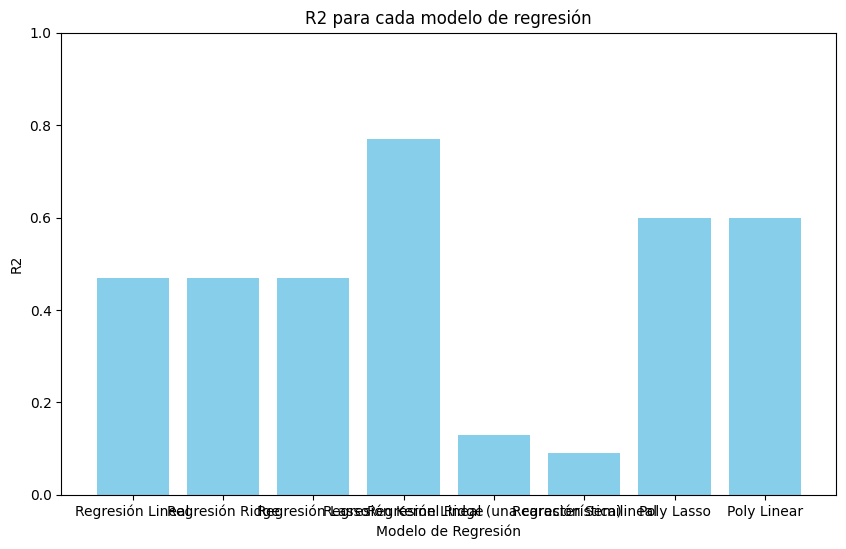

In [ ]:
#YOUR CODE HERE
import matplotlib.pyplot as plt

# Define los nombres de los modelos
model_names = ["Regresión Lineal", "Regresión Ridge", "Regresión Lasso", "Regresión Kernel Ridge", "Regresión Lineal (una característica)", "Regresión Semilineal", "Poly Lasso", "Poly Linear"]
# Define los valores R2 para cada modelo
r2_values = [0.47, 0.47, 0.47, 0.77, 0.13, 0.09, 0.6, 0.6]

# Crea un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(model_names, r2_values, color='skyblue')
plt.title("R2 para cada modelo de regresión")
plt.xlabel("Modelo de Regresión")
plt.ylabel("R2")
plt.ylim(0, 1)  # Ajusta el rango del eje y si es necesario
plt.show()


Which regressor achieves the best $R^2$ coefficient?

<font color = 'green'> YOUR ANSWER HERE